# **Convolutional Neural Networks: Street View Housing Number Digit Recognition**

This project is on classification using Convolutional Neural Networks. We will continue to work with the Street View Housing Numbers (SVHN) image dataset for this project.

--------------
### **Context:** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
### **Objective:**
----------------

Building a CNN model that can identify the digits in the images.

-------------
### **Dataset:**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been done.

## **Mount the drive**
Let us start by mounting the drive and importing the necessary libraries.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

Let us check for the version of TensorFlow.

In [5]:
print(tf.__version__)

2.5.0


## **Load the dataset**
- Now let's load the dataset that is available as a .h5 file.
- Here we will split the data into train and the test dataset

In [6]:
import h5py

# Open the file as read only
h5f = h5py.File('/content/drive/.../SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

Let's check the number of images in the training and testing data.

In [7]:
len(X_train), len(X_test)

(42000, 18000)

- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**
- Use X_train to visualize the first 10 images
- Use Y_train to print the first 10 labels

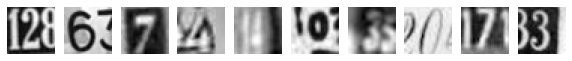

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [8]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray") # write the function to visualize images
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## **Data Preparation**

Steps:
- Print the first image in the train image and figure out the shape of the images
- Reshape the train and the test dataset to make them fit the first convolutional operation that we will create later. Figure out the required shape
- Normalize the train and the test dataset by dividing by 255
- Print the new shapes of the train and the test set
- One-hot encode the target variable

In [9]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [10]:
# Reshaping the dataset to flatten them (THIS IS WRONG!!!). Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)

In [11]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


#### **One-hot encoding the labels in the target variable y_train and y_test**

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#test labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

- Notice that each entry of y_test is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.

In [14]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- We will write a function that returns a sequential model with the following architecture
 - First Convolutional layer with **16 filters and kernel size of 3x3**. Use the **'same' padding** and provide an **apt input shape**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes** and **softmax activation**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model
- we will call the function and store the model in a new variable
- Finally we will fit the model on the train data with a **validation split of 0.2, batch size = 32, verbose = 1, and 20 epochs**, and store the model building history to use later for visualization.

In [18]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Defining the function
def cnn_model_1():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1)) #alpha=0.1
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dense(10, activation='softmax'))
    
    #declaring adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(learning_rate=0.001)
    
    #compiling the model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

In [19]:
#Building the model
model_1 = cnn_model_1()

In [20]:
#Printing the model summary
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        160       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 32)               

In [21]:
# Fitting the model
history_model_1 = model_1.fit(X_train, y_train, epochs=20, validation_split = 0.2, batch_size= 32, verbose = 1)

Epoch 1/20
1050/1050 [==============================] - 66s 62ms/step - loss: 1.1710 - accuracy: 0.6114 - val_loss: 0.6506 - val_accuracy: 0.8094
Epoch 2/20
1050/1050 [==============================] - 65s 62ms/step - loss: 0.5303 - accuracy: 0.8474 - val_loss: 0.5146 - val_accuracy: 0.8539
Epoch 3/20
1050/1050 [==============================] - 65s 62ms/step - loss: 0.4467 - accuracy: 0.8711 - val_loss: 0.4945 - val_accuracy: 0.8585
Epoch 4/20
1050/1050 [==============================] - 65s 62ms/step - loss: 0.3886 - accuracy: 0.8863 - val_loss: 0.4423 - val_accuracy: 0.8768
Epoch 5/20
1050/1050 [==============================] - 65s 61ms/step - loss: 0.3420 - accuracy: 0.8984 - val_loss: 0.4656 - val_accuracy: 0.8717
Epoch 6/20
1050/1050 [==============================] - 65s 62ms/step - loss: 0.3060 - accuracy: 0.9083 - val_loss: 0.4702 - val_accuracy: 0.8720
Epoch 7/20
1050/1050 [==============================] - 65s 62ms/step - loss: 0.2751 - accuracy: 0.9176 - val_loss: 0.4600 -

### **Plotting the validation and training accuracies**

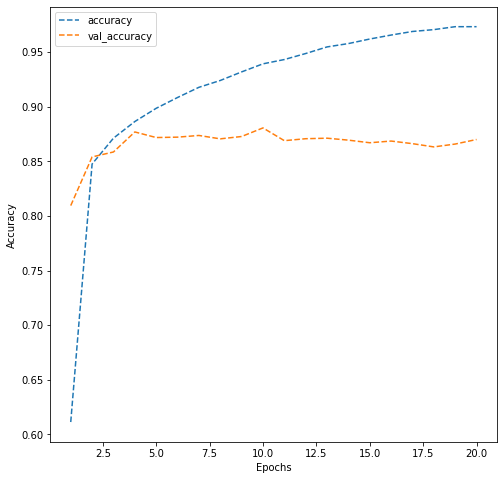

In [22]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
- The model's accuracy on the training data is steadily improving, and manages to reach above 97% by the 20th epoc.
- While the model's accuracy after the 4th epoc on the validation data is over 87%, it doesn't improve that much in the following epocs. This shows that the model is somewhat overfitting the training data.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the keras backend. Also, let's fix the seed again after clearing the backend.

In [23]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [24]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- We will write a function that returns a sequential model with the following architecture
 - First Convolutional layer with **16 filters and kernel size of 3x3**. Use the **'same' padding** and provide an **apt input shape**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add a **dropout layer with rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes** and **softmax activation**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model
- We will call the function and store the model in a new variable
- Finally we will fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs**, and store the model building history to use later for visualization.

#### **Building and training the second CNN model as per the above mentioned architecture**

In [27]:
#Define the function
def cnn_model_2():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    # 1st layer
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))
    # 2nd layer
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    # 3rd layer
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    # 4th layer
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    #declare adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(learning_rate=0.001)
    
    #compile the model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

In [28]:
# Building the model
model_2 = cnn_model_2()

In [29]:
# Model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        160       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9

In [30]:
# Fiting the model
history_model_2 = model_2.fit(X_train, y_train, epochs=30, validation_split = 0.2, batch_size= 128, verbose = 1)

Epoch 1/30
263/263 [==============================] - 104s 391ms/step - loss: 1.4633 - accuracy: 0.5008 - val_loss: 2.6125 - val_accuracy: 0.1637
Epoch 2/30
263/263 [==============================] - 103s 392ms/step - loss: 0.6897 - accuracy: 0.7866 - val_loss: 0.7019 - val_accuracy: 0.7987
Epoch 3/30
263/263 [==============================] - 103s 393ms/step - loss: 0.5592 - accuracy: 0.8270 - val_loss: 0.4655 - val_accuracy: 0.8613
Epoch 4/30
263/263 [==============================] - 103s 392ms/step - loss: 0.4994 - accuracy: 0.8461 - val_loss: 0.4600 - val_accuracy: 0.8651
Epoch 5/30
263/263 [==============================] - 103s 393ms/step - loss: 0.4499 - accuracy: 0.8638 - val_loss: 0.4627 - val_accuracy: 0.8742
Epoch 6/30
263/263 [==============================] - 103s 392ms/step - loss: 0.4103 - accuracy: 0.8749 - val_loss: 0.4084 - val_accuracy: 0.8885
Epoch 7/30
263/263 [==============================] - 103s 393ms/step - loss: 0.3834 - accuracy: 0.8837 - val_loss: 0.3806 -

### **Plotting the validation and training accuracies**

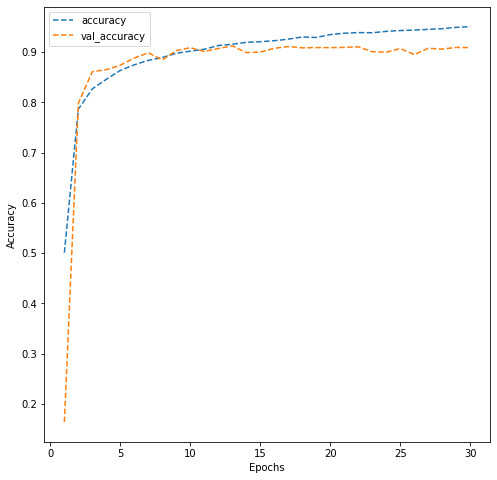

In [31]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
- While the accuracy of the first model on the training data set was above 97%, our new model's accuracy has decreased to 95%.
- The second model with Batch Normalization and dropout layers seems to have reduced the overfitting compared to the first one. 
- The new model is performing better on the validation data and its accuracy on the validation data is about 91% (the first model's accuracy on the validation data was less than 87%).
- The above results show that we have reached a better model with regards to having more generalizable performance.


## **Predictions on the test data set using the 2nd model**

In [32]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1) #Convert probabilities to class labels

**Note:** Earlier, we noticed that each entry of the test data is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [33]:
#Converting each entry to a single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1814
           1       0.89      0.91      0.90      1828
           2       0.94      0.92      0.93      1803
           3       0.93      0.85      0.89      1719
           4       0.90      0.94      0.92      1812
           5       0.91      0.90      0.90      1768
           6       0.88      0.92      0.90      1832
           7       0.95      0.92      0.94      1808
           8       0.89      0.90      0.89      1812
           9       0.90      0.91      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



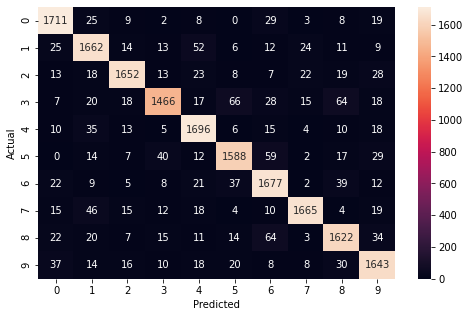

In [34]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### **Observations:**
- The classification report shows that all metrics are above 85% ( which is the recall of the digit 3).
- Class 7 has the highest f1-score of 94%.
- Class 3 and class 8 have the lowest f1-score of 89%.
- The recall of classes 3 and the precision of class 6 are the lowest recalls and precisions.
- The confusion matrix shows that the model can identify the majority of the digits in the images, but there are still some mismatches.
- The model is not weaker at identifying 3s and 5s. The confusion matrix shows that the model has predicted 3s as 5s and also 8s, and 5s as 6.